# 🌳 Algoritmo de Kruskal: Introdução

> 📈 **Contexto Histórico**
>
> Anteriormente, estudamos o método construtivo para formação de árvores geradoras.
>
> Em 1956, Joseph Kruskal se inspirou nesse método para criar um algoritmo eficiente para encontrar árvores geradoras de **custo mínimo** em grafos valorados.

---

## ✨ O que faz o algoritmo de Kruskal?

- Encontra uma **floresta geradora de custo mínimo** em grafos valorados.
- Se o grafo for **conexo**, encontra uma **árvore geradora de custo mínimo** (MST - Minimum Spanning Tree).

---

# ⚙️ Funcionamento do Algoritmo de Kruskal

O algoritmo de Kruskal é um algoritmo **guloso**:  
em cada passo, adiciona uma nova aresta de **custo mínimo**, tomando cuidado para **não formar ciclos**.

## 📝 Passos do Algoritmo

1. 🌲 Crie uma floresta `F` onde cada vértice do grafo é uma árvore isolada.
2. 🧩 Crie um conjunto `S` com todas as arestas do grafo.
3. 🔁 Enquanto `S` não estiver vazio e `F` puder crescer:
   - a) ➖ Remova de `S` uma aresta de **custo mínimo**.
   - b) 🔗 Se essa aresta conectar duas árvores diferentes, adicione-a à floresta `F`, unindo as árvores em uma só.

> O processo termina quando todas as árvores se unem em uma única árvore geradora de custo mínimo (caso o grafo seja conexo).

---

# 🚫 Como evitar ciclos no Kruskal?

O aspecto mais complicado do algoritmo é **evitar a formação de ciclos**.  
Isso pode acontecer ao incluir em `F` uma aresta que conecta dois vértices que já pertencem à mesma árvore.

## 💡 Solução elegante: Conjuntos Disjuntos (Union-Find)

Para resolver esse problema de forma eficiente, usamos a estrutura de **conjuntos disjuntos** (também chamada de Union-Find):

- Cada vértice começa em seu próprio conjunto (ou árvore).
- Ao considerar uma aresta, verificamos se seus dois vértices pertencem a conjuntos diferentes:
  - Se **sim**, a aresta pode ser adicionada sem formar ciclo. Unimos os conjuntos dos dois vértices (operação **union**).
  - Se **não**, a aresta é descartada, pois conectaria vértices já ligados, formando um ciclo.

### ✨ Operações principais

- **find(u):** Descobre a qual conjunto (ou árvore) o vértice `u` pertence.
- **union(u, v):** Une os conjuntos dos vértices `u` e `v` em um só.

Essas operações são otimizadas usando técnicas como **compressão de caminho** e **união por rank**, tornando o algoritmo muito eficiente mesmo para grafos grandes.

> Assim, o algoritmo de Kruskal pode decidir rapidamente se a inclusão de uma aresta criaria um ciclo, garantindo a construção correta da árvore geradora mínima.

---

# 🧮 Algoritmo de Kruskal (pseudocódigo)

Abaixo está o pseudocódigo do algoritmo de Kruskal, destacando o uso das operações de conjuntos disjuntos para evitar ciclos:

```text
KRUSKAL(G, W)
    // Inicialização dos conjuntos
    para cada vértice v em V faça
        CriaConjunto(v)
    // Ordenação das arestas
    Ordene as arestas de E em ordem crescente de custo
    // Laço principal
    para cada aresta (u, v) em E, em ordem crescente de custo faça
        se BuscaConjunto(u) ≠ BuscaConjunto(v) então
            Adicione (u, v) à árvore geradora
            Uniao(u, v)
```

- `CriaConjunto(v)`: Inicializa o conjunto do vértice `v`.
- `BuscaConjunto(u)`: Retorna o representante do conjunto ao qual `u` pertence.
- `Uniao(u, v)`: Une os conjuntos dos vértices `u` e `v`.

> O algoritmo termina quando todas as arestas necessárias foram adicionadas e a árvore geradora mínima está formada.

---

## 🧩 Detalhamento dos elementos do pseudocódigo de Kruskal

- **G e W:**  
  - `G` representa o grafo, ou seja, o conjunto de vértices e arestas.
  - `W` é o conjunto dos custos das arestas, geralmente representado por uma lista de tuplas (peso, u, v) ou por uma matriz de custos.

- **T:**  
  - `T` é a árvore geradora de custo mínimo construída pelo algoritmo.
  - Pode ser armazenada como uma lista de arestas, um grafo não dirigido ou outra estrutura adequada.

- **CriaConjunto(v):**  
  - Inicializa um conjunto para o vértice `v`, ou seja, cada vértice começa em seu próprio conjunto.
  - Implementado na prática pelo método `MAKE-SET(v)`.

- **BuscaConjunto(v):**  
  - Retorna o representante do conjunto ao qual o vértice `v` pertence.
  - Permite verificar se dois vértices estão no mesmo conjunto (ou seja, já estão conectados na árvore parcial).
  - Implementado pelo método `FIND-SET(v)`.

- **Uniao(u, v):**  
  - Une os conjuntos dos vértices `u` e `v`, caso estejam em conjuntos diferentes.
  - Garante que, ao adicionar uma aresta, não seja formado um ciclo.
  - Implementado pelo método `UNION(u, v)`.

Essas operações são fundamentais para garantir a eficiência do algoritmo de Kruskal, especialmente em grafos grandes, pois permitem detectar rapidamente ciclos e unir componentes de forma eficiente.

---


In [7]:
import networkx as nx

class ConjuntosDisjuntos:
    def __init__(self, G):
        self.pai = {v: v for v in G.nodes}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal_G(G):
    T = []
    conjuntos = ConjuntosDisjuntos(G)
    arestas = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]
    arestas.sort(key=lambda x: x[2])
    for u, v, peso in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, peso))
    return T

# Exemplo de uso
G = nx.Graph()
G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=3)
G.add_edge('A', 'D', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('C', 'D', weight=5)

T = Kruskal_G(G)
print("Opção 1 - Apenas G:")
for u, v, peso in T:
    print(f"{u} - {v} (peso {peso})")

Opção 1 - Apenas G:
A - B (peso 1)
B - C (peso 2)
A - D (peso 4)


Opção 2 - V e E:
A - B (peso 1)
B - C (peso 2)
A - D (peso 4)


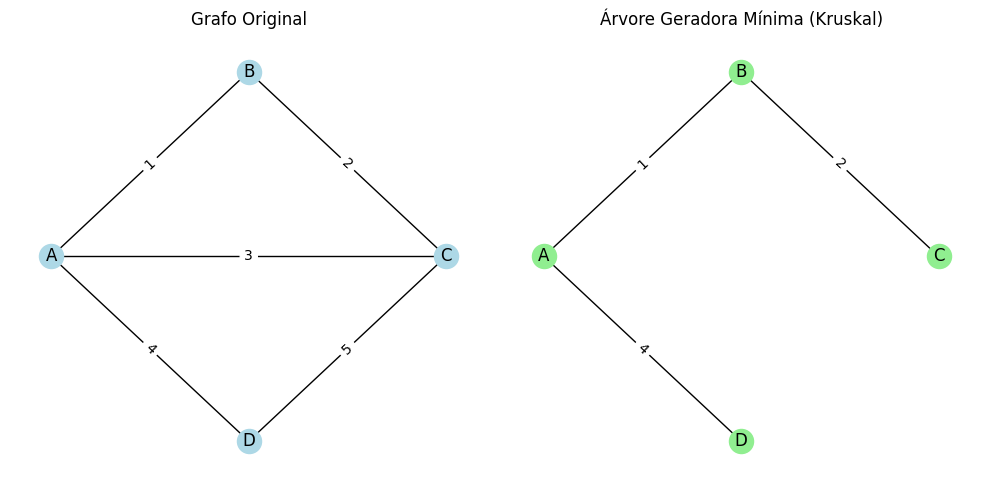

In [16]:
class ConjuntosDisjuntos:
    def __init__(self, V):
        self.pai = {v: v for v in V}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal_VE(V, E):
    T = []
    conjuntos = ConjuntosDisjuntos(V)
    arestas = sorted(E, key=lambda x: x[2])
    for u, v, peso in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, peso))
    return T

# Exemplo de uso
V = ['A', 'B', 'C', 'D']
E = [
    ('A', 'B', 1),
    ('A', 'C', 3),
    ('A', 'D', 4),
    ('B', 'C', 2),
    ('C', 'D', 5)
]

T = Kruskal_VE(V, E)
print("Opção 2 - V e E:")
for u, v, peso in T:
    print(f"{u} - {v} (peso {peso})")


import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

def plot_kruskal_ve(E, T, pos=None):
    # Grafo original
    G = nx.Graph()
    for u, v, peso in E:
        G.add_edge(u, v, weight=peso)

    # Grafo MST
    MST = nx.Graph()
    for u, v, peso in T:
        MST.add_edge(u, v, weight=peso)

    # Se não passar pos, usa spring_layout
    if pos is None:
        pos = nx.spring_layout(G)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo Original")

    plt.subplot(1, 2, 2)
    nx.draw(MST, pos, with_labels=True, node_color='lightgreen')
    labels_mst = nx.get_edge_attributes(MST, 'weight')
    nx.draw_networkx_edge_labels(MST, pos, edge_labels=labels_mst)
    plt.title("Árvore Geradora Mínima (Kruskal)")

    plt.tight_layout()
    plt.show()

# Exemplo de uso com posições definidas:
pos = {'A': (0, 0), 'B': (1, 1), 'C': (2, 0), 'D': (1, -1)}
plot_kruskal_ve(E, T, pos)

Opção 3 - V e matriz W:
A - B (peso 1)
B - C (peso 2)
A - D (peso 4)


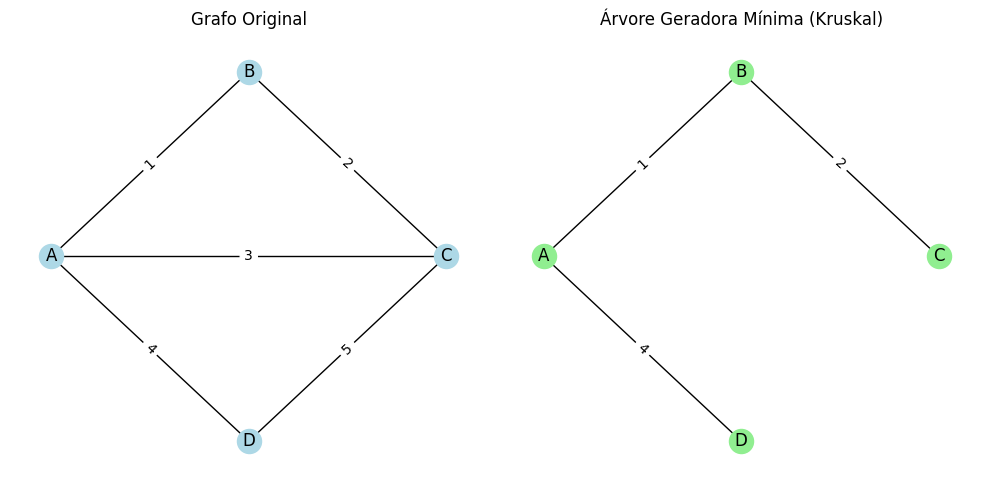

In [17]:
class ConjuntosDisjuntos:
    def __init__(self, V):
        self.pai = {v: v for v in V}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal_VW(V, W):
    T = []
    conjuntos = ConjuntosDisjuntos(V)
    arestas = []
    for i, u in enumerate(V):
        for j, v in enumerate(V):
            if i < j and W[i][j] is not None:
                arestas.append((u, v, W[i][j]))
    arestas.sort(key=lambda x: x[2])
    for u, v, peso in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, peso))
    return T

# Exemplo de uso
V = ['A', 'B', 'C', 'D']
W = [
    [None, 1,    3,    4],
    [1,    None, 2,    None],
    [3,    2,    None, 5],
    [4,    None, 5,    None]
]

T = Kruskal_VW(V, W)
print("Opção 3 - V e matriz W:")
for u, v, peso in T:
    print(f"{u} - {v} (peso {peso})")

import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

def plot_kruskal_vw(V, W, T, pos=None):
    # Grafo original
    G = nx.Graph()
    for i, u in enumerate(V):
        for j, v in enumerate(V):
            if i < j and W[i][j] is not None:
                G.add_edge(u, v, weight=W[i][j])

    # Grafo MST
    MST = nx.Graph()
    for u, v, peso in T:
        MST.add_edge(u, v, weight=peso)

    # Se não passar pos, usa spring_layout
    if pos is None:
        pos = nx.spring_layout(G)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo Original")

    plt.subplot(1, 2, 2)
    nx.draw(MST, pos, with_labels=True, node_color='lightgreen')
    labels_mst = nx.get_edge_attributes(MST, 'weight')
    nx.draw_networkx_edge_labels(MST, pos, edge_labels=labels_mst)
    plt.title("Árvore Geradora Mínima (Kruskal)")

    plt.tight_layout()
    plt.show()

# Exemplo de uso com posições definidas:
pos = {'A': (0, 0), 'B': (1, 1), 'C': (2, 0), 'D': (1, -1)}
plot_kruskal_vw(V, W, T, pos)

Arestas da Árvore Geradora Mínima:
A - B (custo 1)
B - C (custo 2)
A - D (custo 4)


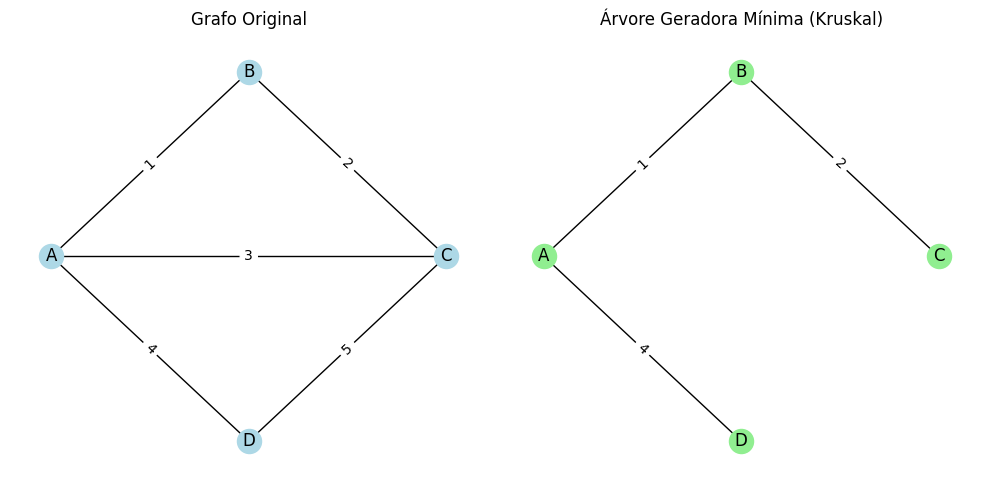

In [18]:
class ConjuntosDisjuntos:
    def __init__(self, V):
        self.pai = {v: v for v in V}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal(G, W):
    V, E = G
    T = []
    conjuntos = ConjuntosDisjuntos(V)
    arestas = []
    for u, v in E:
        i = V.index(u)
        j = V.index(v)
        custo = W[i][j]
        if custo is not None:
            arestas.append((u, v, custo))
    arestas.sort(key=lambda x: x[2])
    for u, v, custo in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, custo))
    return T

# Exemplo de uso
V = ['A', 'B', 'C', 'D']
E = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('C', 'D')]
W = [
    [None, 1,    3,    4],
    [1,    None, 2,    None],
    [3,    2,    None, 5],
    [4,    None, 5,    None]
]

T = Kruskal((V, E), W)
print("Arestas da Árvore Geradora Mínima:")
for u, v, custo in T:
    print(f"{u} - {v} (custo {custo})")


import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

def plot_kruskal(V, E, W, T, pos=None):
    # Grafo original
    G = nx.Graph()
    for u, v in E:
        i = V.index(u)
        j = V.index(v)
        if W[i][j] is not None:
            G.add_edge(u, v, weight=W[i][j])

    # Grafo MST
    MST = nx.Graph()
    for u, v, custo in T:
        MST.add_edge(u, v, weight=custo)

    # Se não passar pos, usa spring_layout
    if pos is None:
        pos = nx.spring_layout(G)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo Original")

    plt.subplot(1, 2, 2)
    nx.draw(MST, pos, with_labels=True, node_color='lightgreen')
    labels_mst = nx.get_edge_attributes(MST, 'weight')
    nx.draw_networkx_edge_labels(MST, pos, edge_labels=labels_mst)
    plt.title("Árvore Geradora Mínima (Kruskal)")

    plt.tight_layout()
    plt.show()

# Exemplo de uso com posições definidas:
pos = {'A': (0, 0), 'B': (1, 1), 'C': (2, 0), 'D': (1, -1)}
plot_kruskal(V, E, W, T, pos)

## ⏱️ Análise de Complexidade do Algoritmo de Kruskal

O tempo de execução do algoritmo de Kruskal depende principalmente de dois fatores:

- **Ordenação das arestas:**  
  - Pode ser feita em tempo O(E log E), onde E é o número de arestas do grafo.

- **Estrutura de conjuntos disjuntos:**  
  - A inicialização dos conjuntos disjuntos leva tempo O(V), onde V é o número de vértices.
  - Cada operação de união e busca pode ser feita em tempo quase constante, graças ao uso de compressão de caminho e união por rank (ver seção 4.5).

No laço principal, são realizadas O(E) operações de busca e união, resultando em tempo O(E · α(V)), onde α(V) é a função inversa de Ackermann, que cresce muito lentamente e pode ser considerada praticamente constante para todos os casos práticos.

Assim, o tempo total do algoritmo é dominado pela ordenação das arestas:

- **Tempo total:**  
  O(E log E) ≈ O(E log V), pois em grafos simples E ≤ V².

Portanto, o algoritmo de Kruskal é eficiente mesmo para grafos grandes, sendo sua complexidade assintótica O(E log V).

---

## 🔗 O que é "união por rank"?

A **união por rank** é uma técnica utilizada na estrutura de conjuntos disjuntos (Union-Find) para otimizar a operação de união de conjuntos.

- Cada conjunto é representado por uma árvore.
- O **rank** (ou altura) de cada árvore é mantido.
- Ao unir dois conjuntos, a raiz da árvore com menor rank é ligada à raiz da árvore com maior rank.
- Se ambos os ranks forem iguais, um deles é escolhido como nova raiz e seu rank é incrementado em 1.

**Vantagem:**  
Essa estratégia mantém as árvores sempre o mais rasas possível, evitando que elas cresçam demais. Isso torna as operações de busca (find) muito mais rápidas, especialmente quando combinada com a compressão de caminho.

**Resumo:**  
- União por rank = sempre unir a árvore menor sob a maior.
- Garante eficiência quase constante nas operações de união e busca.

---

## 📝 Exemplo prático: Kruskal no grafo da Figura 6.19

Vamos aplicar o algoritmo de Kruskal para encontrar a árvore geradora de custo mínimo do grafo abaixo:

```
      3
   a ----- b
  /|     / | \
2 |   8/   |  \ 13
  |  /     |   \
  f        c    g
  | \     /    /
 8|  \8  /10  /14
  |   \ /    /
  d----e----g
     4   9
```

### Arestas do grafo (vi, vj, custo):

| vi | vj | custo |
|----|----|-------|
| d  | f  |   2   |
| b  | g  |   2   |
| a  | e  |   3   |
| a  | d  |   4   |
| e  | f  |   6   |
| b  | e  |   8   |
| b  | c  |   8   |
| a  | f  |   8   |
| d  | g  |   9   |
| e  | g  |  10   |
| c  | g  |  13   |
| a  | g  |  14   |

### Sequência de arestas ordenadas por custo:

1. (d, f, 2)
2. (b, g, 2)
3. (a, e, 3)
4. (a, d, 4)
5. (e, f, 6)
6. (b, e, 8)
7. (b, c, 8)
8. (a, f, 8)
9. (d, g, 9)
10. (e, g, 10)
11. (c, g, 13)
12. (a, g, 14)

> Essa ordenação é o ponto de partida para a execução do algoritmo de Kruskal, que irá selecionar as arestas de menor custo, evitando ciclos, até formar a árvore geradora mínima.

---

Opção 2 - V e E:
b - g (peso 2)
d - f (peso 2)
a - e (peso 3)
a - d (peso 4)
b - d (peso 8)
b - c (peso 10)


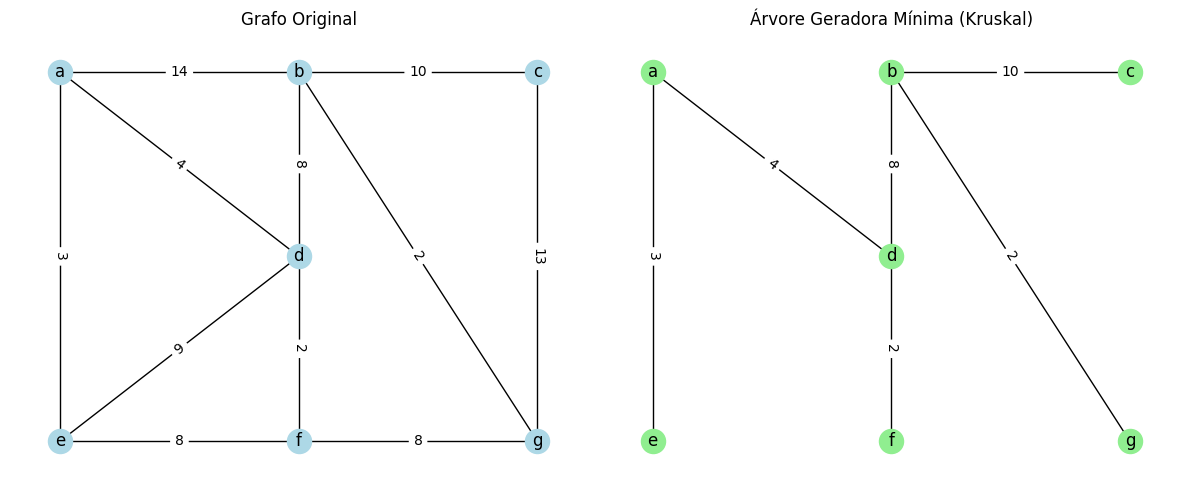

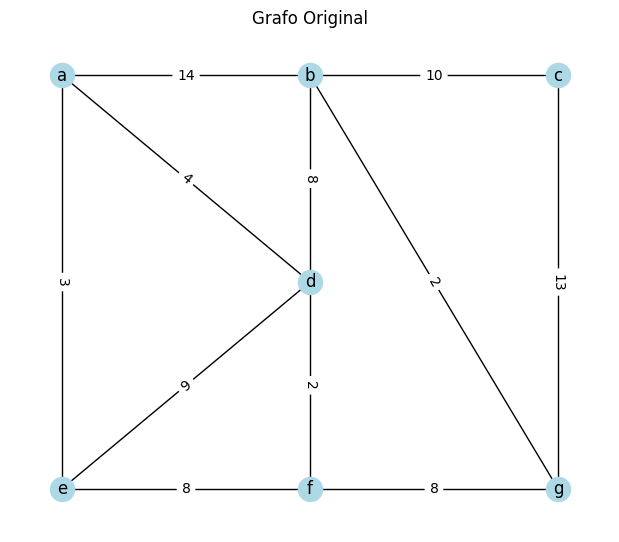

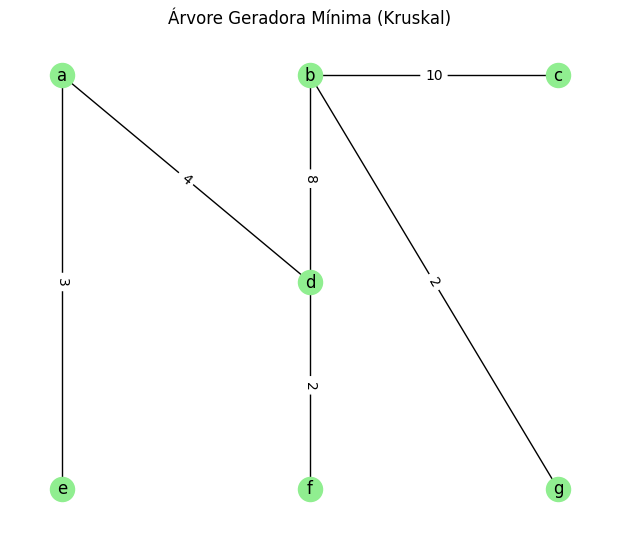

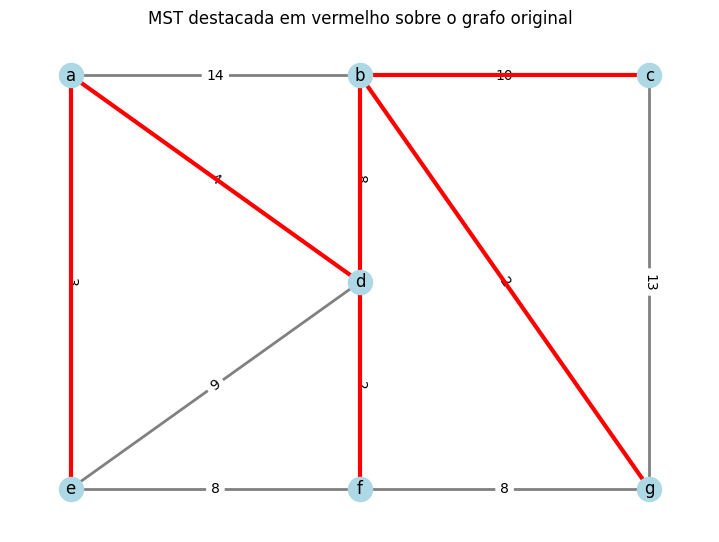

In [30]:
# Exemplo prático com NetworkX usando o grafo da Figura 6.19

import networkx as nx
import matplotlib.pyplot as plt




def plot_kruskal_ve(E, T, pos=None):
    # Grafo original
    G = nx.Graph()
    for u, v, peso in E:
        G.add_edge(u, v, weight=peso)

    # Grafo MST
    MST = nx.Graph()
    for u, v, peso in T:
        MST.add_edge(u, v, weight=peso)

    # Se não passar pos, usa spring_layout
    if pos is None:
        pos = nx.spring_layout(G)

    # Cria uma cópia das posições e desloca a MST para a direita
    pos_mst = {k: (x + 2.5, y) for k, (x, y) in pos.items()}

    plt.figure(figsize=(12, 5))

    # Grafo original à esquerda
    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo Original")

    # MST à direita, deslocada
    plt.subplot(1, 2, 2)
    nx.draw(MST, pos_mst, with_labels=True, node_color='lightgreen')
    labels_mst = nx.get_edge_attributes(MST, 'weight')
    nx.draw_networkx_edge_labels(MST, pos_mst, edge_labels=labels_mst)
    plt.title("Árvore Geradora Mínima (Kruskal)")

    plt.tight_layout()
    plt.show()

def plot_grafo_original(E, pos=None):
    """
    Plota apenas o grafo original.
    E: lista de arestas (u, v, peso)
    pos: dicionário de posições dos vértices (opcional)
    """
    G = nx.Graph()
    for u, v, peso in E:
        G.add_edge(u, v, weight=peso)
    if pos is None:
        pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Grafo Original")
    plt.show()

def plot_mst(T, pos=None):
    """
    Plota apenas a árvore geradora mínima (MST).
    T: lista de arestas da MST (u, v, peso)
    pos: dicionário de posições dos vértices (opcional)
    """
    MST = nx.Graph()
    for u, v, peso in T:
        MST.add_edge(u, v, weight=peso)
    if pos is None:
        pos = nx.spring_layout(MST)
    plt.figure(figsize=(6, 5))
    nx.draw(MST, pos, with_labels=True, node_color='lightgreen')
    labels_mst = nx.get_edge_attributes(MST, 'weight')
    nx.draw_networkx_edge_labels(MST, pos, edge_labels=labels_mst)
    plt.title("Árvore Geradora Mínima (Kruskal)")
    plt.show()

def plot_mst_sobre_grafo(E, T, pos=None):
    """
    Plota o grafo original e destaca a MST em vermelho sobre ele.
    E: lista de arestas do grafo original (u, v, peso)
    T: lista de arestas da MST (u, v, peso)
    pos: dicionário de posições dos vértices (opcional)
    """
    G = nx.Graph()
    for u, v, peso in E:
        G.add_edge(u, v, weight=peso)

    MST = nx.Graph()
    for u, v, peso in T:
        MST.add_edge(u, v, weight=peso)

    if pos is None:
        pos = nx.spring_layout(G)

    plt.figure(figsize=(7, 5))

    # Desenha o grafo original (arestas em cinza)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Destaca a MST (arestas em vermelho e mais largas)
    nx.draw_networkx_edges(MST, pos, edge_color='red', width=3)

    plt.title("MST destacada em vermelho sobre o grafo original")
    plt.show()


class ConjuntosDisjuntos:
    def __init__(self, V):
        self.pai = {v: v for v in V}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal_VE(V, E):
    T = []
    conjuntos = ConjuntosDisjuntos(V)
    arestas = sorted(E, key=lambda x: x[2])
    for u, v, peso in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, peso))
    return T



# Mapeamento de letras para índices
V = ['a', 'b', 'c', 'd', 'e', 'f', 'g']


# Lista de arestas conforme o exemplo do enunciado
E = [
    ('a', 'b', 14),
    ('a', 'd', 4),
    ('a', 'e', 3),
    ('b', 'c', 10),
    ('b', 'd', 8),
    ('b', 'g', 2),
    ('c', 'g', 13),
    ('d', 'e', 9),
    ('d', 'f', 2),
    ('e', 'f', 8),
    ('f', 'g', 8),
]

T = Kruskal_VE(V, E)
print("Opção 2 - V e E:")
for u, v, peso in T:
    print(f"{u} - {v} (peso {peso})")

# Exemplo de uso com posições definidas:
pos = {
    'a': (-4, 2),
    'b': (0, 2),
    'c': (4, 2),
    'd': (0, 1),
    'e': (-4, 0),
    'f': (0, 0),
    'g': (4, 0)
}
plot_kruskal_ve(E, T, pos)

plot_grafo_original(E, pos)
plot_mst(T, pos)
plot_mst_sobre_grafo(E, T, pos)

Arestas ordenadas por peso:
b - g (peso 2)
d - f (peso 2)
a - e (peso 3)
a - d (peso 4)
b - d (peso 8)
e - f (peso 8)
f - g (peso 8)
d - e (peso 9)
b - c (peso 10)
c - g (peso 13)
a - b (peso 14)
Aresta     Operação             Coleção de conjuntos disjuntos
---------- -------------------- ----------------------------------------
início     -                    {a} {b} {c} {d} {e} {f} {g}


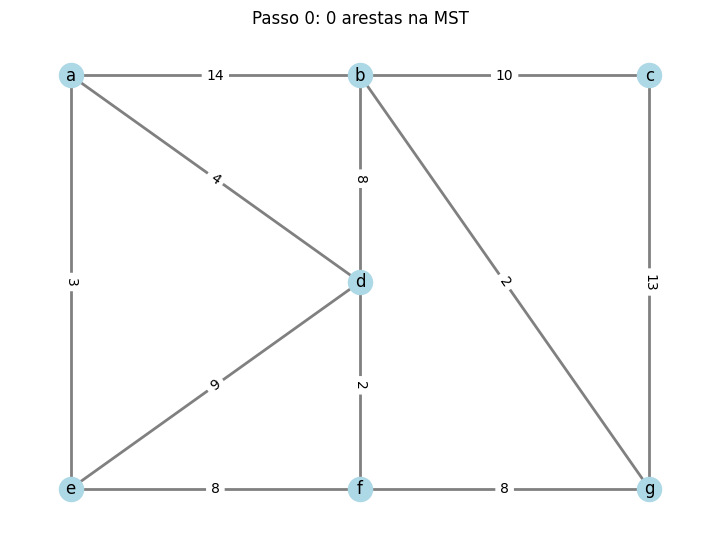

(b,g)      uniao(b,g)           {a} {b, g} {c} {d} {e} {f}


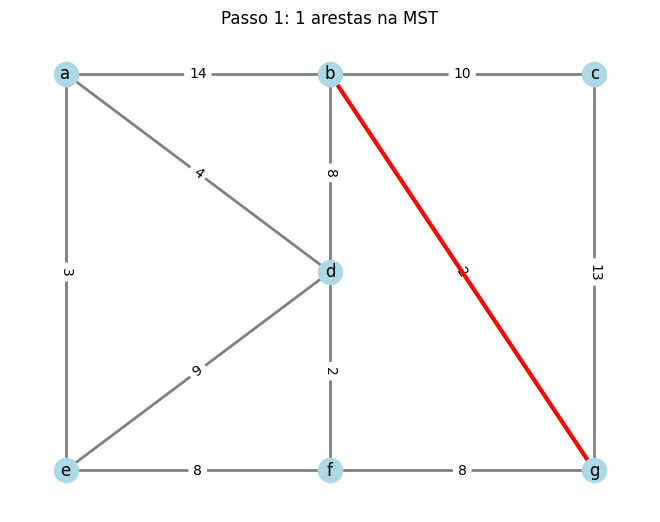

(d,f)      uniao(d,f)           {a} {b, g} {c} {d, f} {e}


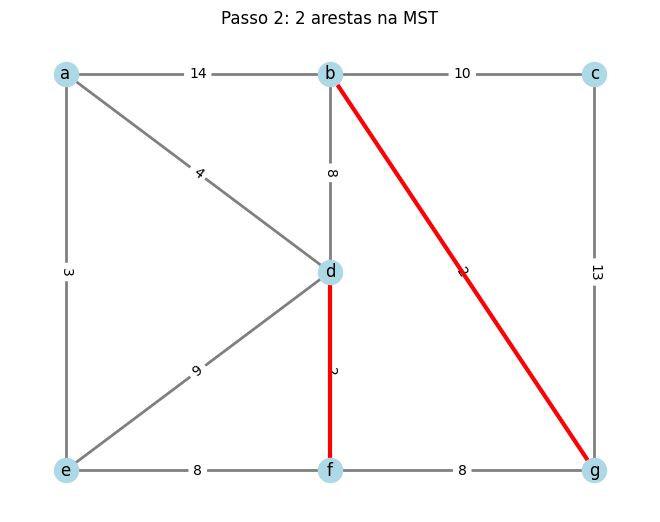

(a,e)      uniao(a,e)           {a, e} {b, g} {c} {d, f}


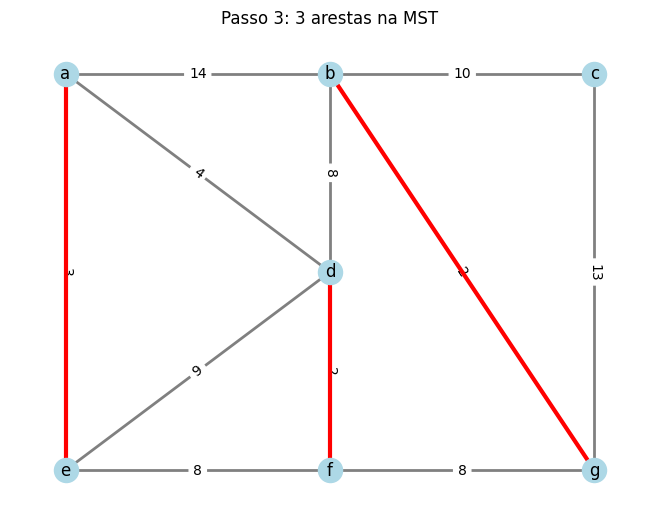

(a,d)      uniao(a,d)           {a, d, e, f} {b, g} {c}


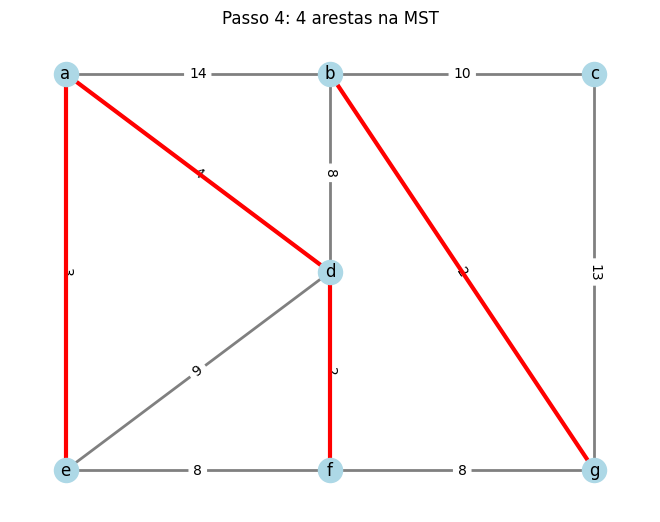

(b,d)      uniao(b,d)           {a, b, d, e, f, g} {c}


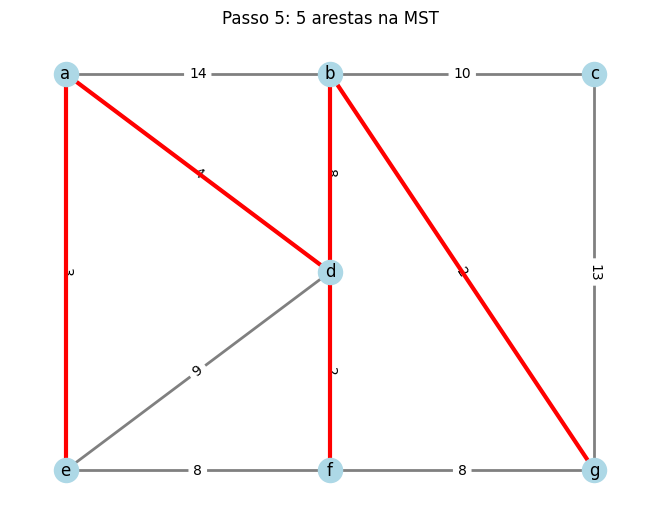

(e,f)      -                    {a, b, d, e, f, g} {c}


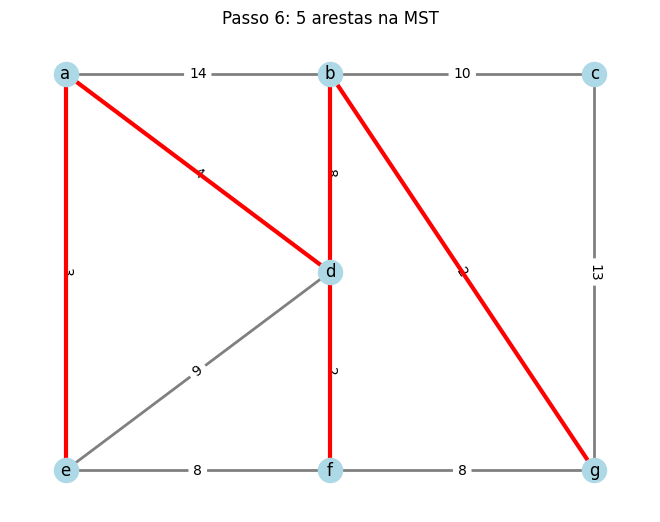

(f,g)      -                    {a, b, d, e, f, g} {c}


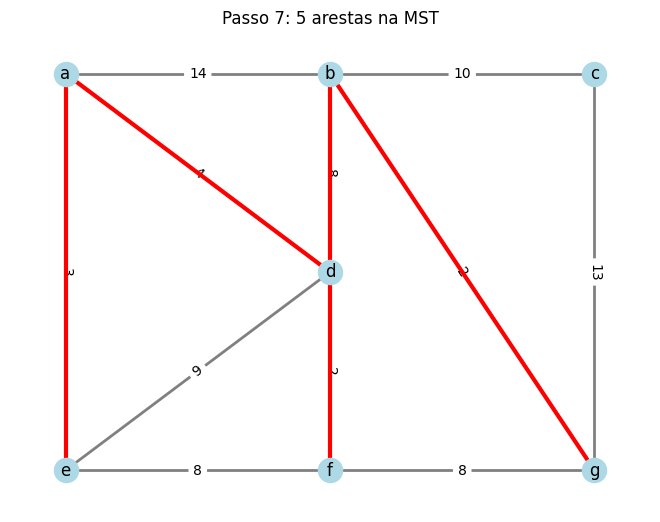

(d,e)      -                    {a, b, d, e, f, g} {c}


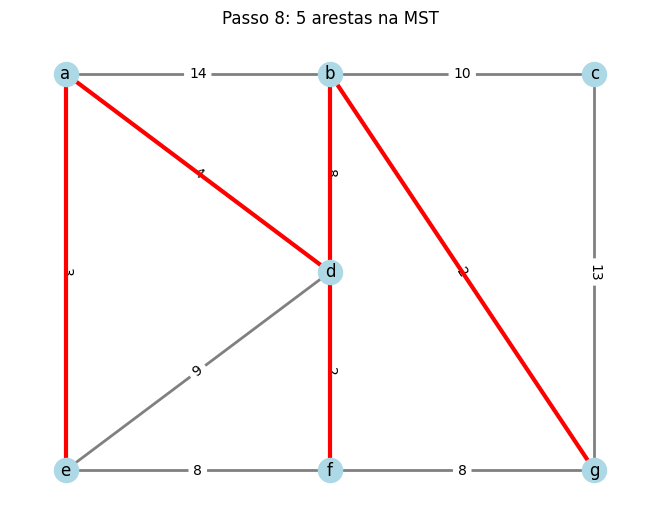

(b,c)      uniao(b,c)           {a, b, c, d, e, f, g}


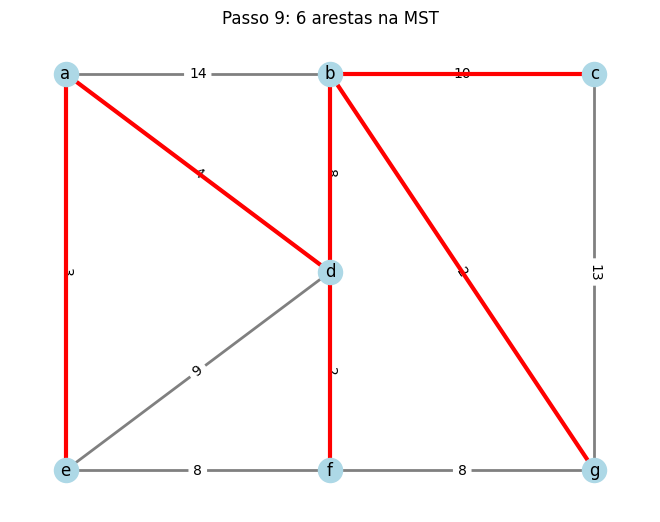

(c,g)      -                    {a, b, c, d, e, f, g}


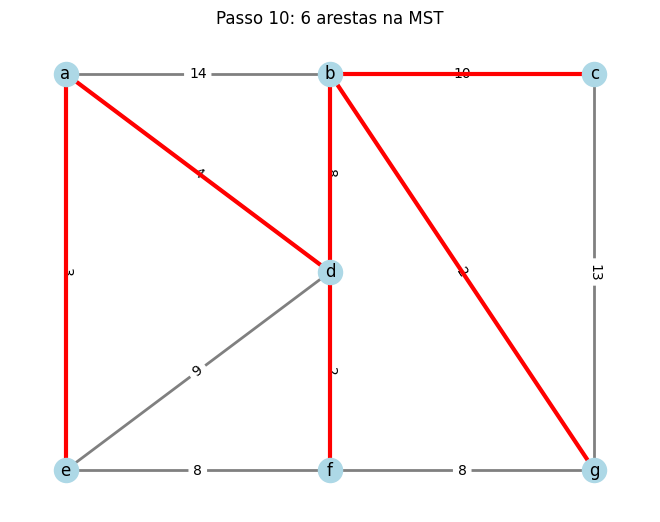

(a,b)      -                    {a, b, c, d, e, f, g}


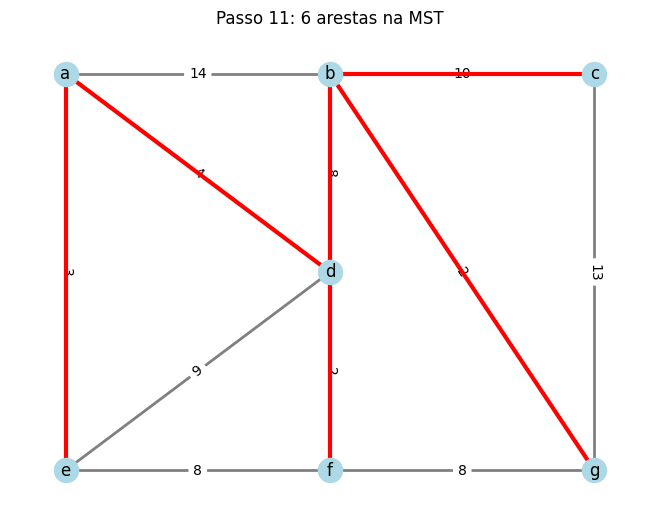


Árvore Geradora Mínima Final:
b - g (peso 2)
d - f (peso 2)
a - e (peso 3)
a - d (peso 4)
b - d (peso 8)
b - c (peso 10)

Tabela completa dos passos do Kruskal:
Aresta     Operação             Coleção de conjuntos disjuntos
---------- -------------------- ----------------------------------------
início     -                    {a} {b} {c} {d} {e} {f} {g}
(b,g)      uniao(b,g)           {a} {b, g} {c} {d} {e} {f}
(d,f)      uniao(d,f)           {a} {b, g} {c} {d, f} {e}
(a,e)      uniao(a,e)           {a, e} {b, g} {c} {d, f}
(a,d)      uniao(a,d)           {a, d, e, f} {b, g} {c}
(b,d)      uniao(b,d)           {a, b, d, e, f, g} {c}
(e,f)      -                    {a, b, d, e, f, g} {c}
(f,g)      -                    {a, b, d, e, f, g} {c}
(d,e)      -                    {a, b, d, e, f, g} {c}
(b,c)      uniao(b,c)           {a, b, c, d, e, f, g}
(c,g)      -                    {a, b, c, d, e, f, g}
(a,b)      -                    {a, b, c, d, e, f, g}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def conjuntos_disjuntos_str(pai):
    grupos = {}
    for v in pai:
        raiz = v
        while pai[raiz] != raiz:
            raiz = pai[raiz]
        grupos.setdefault(raiz, set()).add(v)
    return " ".join("{" + ", ".join(sorted(grupos[raiz])) + "}" for raiz in sorted(grupos))

def plot_kruskal_passo(E, T_parcial, pos, passo):
    G = nx.Graph()
    for u, v, peso in E:
        G.add_edge(u, v, weight=peso)
    MST = nx.Graph()
    for u, v, peso in T_parcial:
        MST.add_edge(u, v, weight=peso)
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', width=2)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw_networkx_edges(MST, pos, edge_color='red', width=3)
    plt.title(f"Passo {passo}: {len(T_parcial)} arestas na MST")
    plt.pause(1)

class ConjuntosDisjuntos:
    def __init__(self, V):
        self.pai = {v: v for v in V}

    def BuscaConjunto(self, v):
        if self.pai[v] != v:
            self.pai[v] = self.BuscaConjunto(self.pai[v])
        return self.pai[v]

    def Uniao(self, u, v):
        raiz_u = self.BuscaConjunto(u)
        raiz_v = self.BuscaConjunto(v)
        if raiz_u != raiz_v:
            self.pai[raiz_v] = raiz_u
            return True
        return False

def Kruskal_VE_passo(V, E, pos):
    T = []
    conjuntos = ConjuntosDisjuntos(V)
    arestas = sorted(E, key=lambda x: x[2])
    print("Arestas ordenadas por peso:")
    print(arestas)
    plt.ion()
    plt.figure(figsize=(7, 5))
    header = f"{'Aresta':<10} {'Operação':<20} {'Coleção de conjuntos disjuntos'}"
    sep = f"{'-'*10} {'-'*20} {'-'*40}"
    table = [header, sep]
    print(header)
    print(sep)
    table.append(f"{'início':<10} {'-':<20} {conjuntos_disjuntos_str(conjuntos.pai)}")
    print(f"{'início':<10} {'-':<20} {conjuntos_disjuntos_str(conjuntos.pai)}")
    plot_kruskal_passo(E, T, pos, 0)
    passo = 1
    for u, v, peso in arestas:
        if conjuntos.BuscaConjunto(u) != conjuntos.BuscaConjunto(v):
            conjuntos.Uniao(u, v)
            T.append((u, v, peso))
            op = f"uniao({u},{v})"
        else:
            op = "-"
        linha = f"{f'({u},{v})':<10} {op:<20} {conjuntos_disjuntos_str(conjuntos.pai)}"
        table.append(linha)
        print(linha)
        plot_kruskal_passo(E, T, pos, passo)
        passo += 1
    plt.ioff()
    plt.show()
    return T, "\n".join(table)

# Exemplo de uso
V = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
E = [
    ('a', 'b', 14),
    ('a', 'd', 4),
    ('a', 'e', 3),
    ('b', 'c', 10),
    ('b', 'd', 8),
    ('b', 'g', 2),
    ('c', 'g', 13),
    ('d', 'e', 9),
    ('d', 'f', 2),
    ('e', 'f', 8),
    ('f', 'g', 8),
]
pos = {
    'a': (-4, 4),
    'b': (0,4),
    'c': (4, 4),
    'd': (0, 2),
    'e': (-4, 0),
    'f': (0, 0),
    'g': (4, 0)
}
T, tabela = Kruskal_VE_passo(V, E, pos)
print("\nÁrvore Geradora Mínima Final:")
for u, v, peso in T:
    print(f"{u} - {v} (peso {peso})")

print("\nTabela completa dos passos do Kruskal:")
print(tabela)